# Linear Regression Example 1
This notebook is to demonstrate linear regression on a really simple example without the use of any ML libraries

In [399]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

# Get Training Data
We'll create some random sample data from a Normal distribution with `np.random.randn(dim0, dim1)`
and add some "gaussian noise" in the form of another random vector from Normal distribution to our response  variable `Y = theta0*x0 + theta1*x1 + noise` so that we don't just get a straight line of data, because that's too easy

In [400]:
N = 100 # Number of data points
x0 = np.ones([N, 1]) # Vector of ones to match up with y-intercept for matrix multiplication
x1 = np.random.randn(N, 1) # Feature taken from normal distribution
X = np.hstack((x0, x1)) # 100x2 Matrix of column1 = 1's and column2 = feature1
noise = np.random.randn(N, 1) # Random noise vector to simulate real world data

theta0 = 0.0 # True value of y-intercept
theta1 = 1.0 # True value of slope / coefficient for x1
true_thetas = np.array([[theta0, theta1]]) # Put theta coefficients into a vector
Y = theta0*x0 + theta1*x1 + noise # Linear equation for true Y 
#Y = np.matmul(true_thetas, X.T) # Matrix equation for true Y
print(Y.shape)

(100, 1)


# Plot Training Data

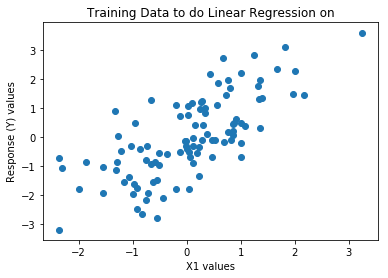

In [401]:
plt.scatter(X[:, 1], Y)
plt.xlabel('X1 values')
plt.ylabel('Response (Y) values')
plt.title('Training Data to do Linear Regression on')
plt.show()

# Cost Function
Mean Squared Error (MSE) Cost function defined in class:

$$\Large Cost = \dfrac{1}{2N} \sum_{i=1}^{N} { (y_{pred_i} - y_{true_i})^2 }$$

Essentially just computing how far each prediction is from the true value

In [402]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

# Function to Optimize Cost/Loss (Gradient Descent)

Repeat for K iterations or until convergence:

$$ \Large \theta = \theta - \frac{\partial}{\partial \theta} \Bigg[ \dfrac{\alpha}{2N} \sum_{i=1}^{N} { (y_{pred_i} - y_{true_i})^2 } \Bigg] $$

$$ \Large \theta = \theta - \dfrac{\alpha}{N} \sum_{i=1}^{N} { (y_{pred_i} - y_{true_i}) * X } $$

In [408]:
def gradientDescent(X, y, theta=None, alpha=0.001, iters=100):
    if theta is None:
        # Set the seed for reproducibility
        np.random.seed(12345)
        theta = np.random.randn(1, 2)
        
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        
        if i % 100 == 0: # just look at cost every ten loops for debugging
            print('Iteration {}:    Cost = {}'.format(i, cost))
            
    return (theta, cost)

# Fitting our Model

In [409]:
# Hyperparameters
iterations = 2000 # Number of times to repeat gradient descent
alpha = 0.001 # Learning Rate

In [410]:
# Set random seed for reproducibility
np.random.seed(12345)
# Get random values for theta0 and theta1 to start with
starting_thetas = np.random.randn(1, 2)
# Get optimized theta0 and theta1 values by minimizing Cost Function via Gradient Descent
fitted_thetas, cost = gradientDescent(X, Y, starting_thetas, alpha, iterations)

Iteration 0:    Cost = 0.6088747389735317
Iteration 100:    Cost = 0.5809574482751166
Iteration 200:    Cost = 0.5584913579998116
Iteration 300:    Cost = 0.5404120453199738
Iteration 400:    Cost = 0.5258629321773909
Iteration 500:    Cost = 0.5141547001785066
Iteration 600:    Cost = 0.5047326304423173
Iteration 700:    Cost = 0.49715032090714145
Iteration 800:    Cost = 0.4910485357807227
Iteration 900:    Cost = 0.486138184989939
Iteration 1000:    Cost = 0.48218662717402405
Iteration 1100:    Cost = 0.47900664724093667
Iteration 1200:    Cost = 0.47644758623199623
Iteration 1300:    Cost = 0.47438820321976516
Iteration 1400:    Cost = 0.47273093103048747
Iteration 1500:    Cost = 0.4713972536236943
Iteration 1600:    Cost = 0.47032398610708925
Iteration 1700:    Cost = 0.4694602811326636
Iteration 1800:    Cost = 0.46876521983662867
Iteration 1900:    Cost = 0.46820587318191387


In [411]:
print('Fitted_Thetas:', fitted_thetas)
print('True Thetas:', true_thetas)

Fitted_Thetas: [[-0.053334    0.90830155]]
True Thetas: [[0. 1.]]


# Compare Fitted Model to True Data

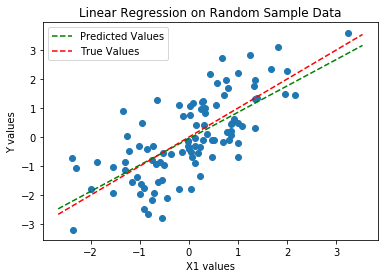

In [412]:
plt.scatter(X[:, 1], Y) # True data
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) # Get range of x-axis
y_pred = fitted_thetas[0][0] + fitted_thetas[0][1]*x_vals
y_true = theta[0][0] + theta[0][1]*x_vals
# Plot properties
plt.plot(x_vals, y_pred, 'g--') # Predicted line of best fit from model
plt.plot(x_vals, y_true, 'r--') # True line of best fit
plt.legend(['Predicted Values', 'True Values'])
plt.title('Linear Regression on Random Sample Data')
plt.ylabel('Y values')
plt.xlabel('X1 values')
plt.show()

# Your Turn
We successfully fitted a model to this training data

**Now try seeing how this model performs on different testing data...**

In [398]:
# Create test data (Similar to training set up top)

# Predict test data y values using the fitted model 
# (no gradient descent or anything needed, we already have the fitted thetas)

# Compare the predicted y_test values to the true y_test values (Plot it or whatever you want)
